In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [10]:
df = pd.read_csv(r"data\BankChurners_preprocessed.csv")

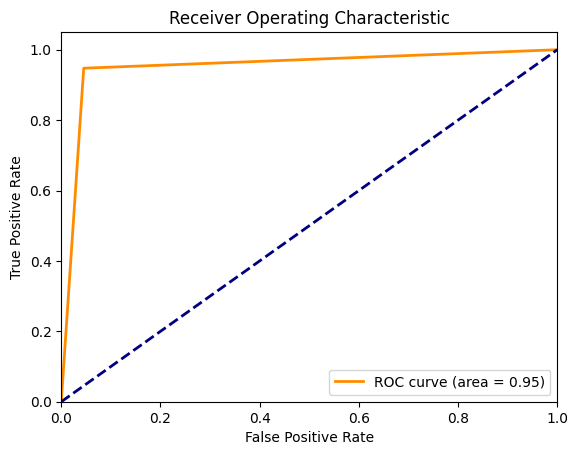

In [11]:
# Splitting data into features and target
X = df.drop(['Attrition_Flag'], axis=1)  # dropping the target and identifier columns
y = df['Attrition_Flag']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X,y)

X_train, X_test, y_train, y_test= train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Splitting the dataset into train and test sets with stratification
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Training the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict probabilities for the test set
y_probs = dt_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_probs)
conf_matrix = pd.crosstab(y_test, y_probs, rownames=['Actual'], colnames=['Predicted'], margins=True)
classification_rep = classification_report(y_test, y_probs)

# Calculate FPR, TPR, and Thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print("")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print("\nROC AUC:\n", roc_auc)


Accuracy: 0.9511764705882353

Confusion Matrix:
 Predicted   0.0   1.0   All
Actual                     
0          1646    78  1724
1            88  1588  1676
All        1734  1666  3400

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1724
           1       0.95      0.95      0.95      1676

    accuracy                           0.95      3400
   macro avg       0.95      0.95      0.95      3400
weighted avg       0.95      0.95      0.95      3400


ROC AUC:
 0.9511252069616644


Cross-Validation Scores: [0.81737414 0.89141165 0.95160494 0.95111111 0.85382716]
Mean CV Score: 0.8930657989348347
Standard Deviation in CV Scores: 0.05304285788537381


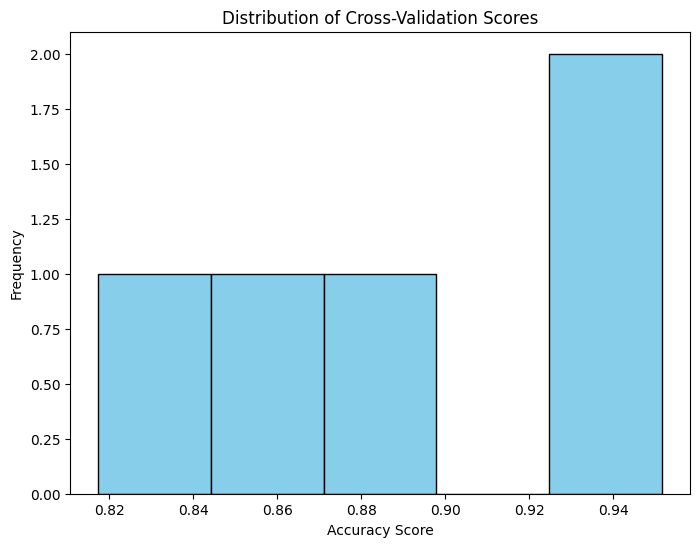

In [13]:
# Perform enhanced cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Calculate mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print detailed cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Standard Deviation in CV Scores:", std_cv_score)

# Plotting the distribution of cross-validation scores
plt.figure(figsize=(8, 6))
plt.hist(cv_scores, bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Cross-Validation Scores')
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.show()
